In [1]:
import io
#npx degit jghawaly/CSC7809_FoundationModels/Project2/data/raw raw/                             
import os, glob
from typing import Tuple
import numpy as np
import torch
import numpy as np
from functools import reduce
import sentencepiece as spm
import torch
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
from torch.nn import CrossEntropyLoss
from torch.optim import AdamW, lr_scheduler
from torcheval.metrics.metric import Metric
from torcheval.metrics.text import Perplexity, BLEUScore
import json
from tqdm import tqdm
from datetime import datetime
from word_prediction import TokenizedDataset, read_jsonl, add_special_token, training_kit, mkcollation, evaluate_perplexity
from models import TransformerModel

In [2]:
tokenizer_location = "bptokenizer.model"
training_data = read_jsonl('./data/train.jsonl')
testing_data = read_jsonl('./data/test.jsonl')
sp = spm.SentencePieceProcessor(tokenizer_location)

embed_dim=320
output_size=sp.GetPieceSize()
feedforward_size=1024
batch_size=256
seq_len = 50  # Length of the input sequence


In [3]:

if torch.cuda.is_available():
    print('torch cuda is_available')
    device = torch.device('cuda')          # Use GPU
else:
    print('torch cuda not is_available')
    device = torch.device('cpu')           # Use CPU
    
metrics = {
    'perp': Perplexity(ignore_index=sp.pad_id()).to(device),
    'bleu': BLEUScore(n_gram=3).to(device)
}

torch cuda is_available


In [4]:
collation = mkcollation(sp.pad_id())
 
training_loader = DataLoader(
    TokenizedDataset(training_data, sp, seq_len),
    batch_size=batch_size,
    shuffle=True,
    drop_last=True,

    collate_fn=collation
) 
valset, testset = torch.utils.data.random_split(TokenizedDataset(testing_data, sp, seq_len), [.8, .2])
validation_loader = DataLoader(
    valset,
    drop_last=True,
    shuffle=False,
    batch_size=batch_size,
    collate_fn=collation
)

test_loader = DataLoader(
    testset,
    shuffle=False,
    drop_last=True,
    batch_size=batch_size,
    collate_fn=collation
)

In [5]:
model = TransformerModel(
        feedforward_size=feedforward_size,
        embed_dim=embed_dim,
        output_size=output_size,
        batch_size=batch_size,
        sequence_length=seq_len,
        device=device,
        tokenizer=sp,
        name="transformer"
).to(device)
trainkit = training_kit(params=model.parameters(),
                        lr=0.001,
                        weight_decay=0.01,
                        epochs=75,
                        dataloader=training_loader,
                        valloader=validation_loader,
                        batch_size=batch_size)

In [6]:
training_loss, validation_loss = model.reps(trainkit)

  1%|██▎                                                                                                                                                                       | 1/75 [00:14<18:20, 14.87s/it]

numbers = (avg loss 6.437489268067595 avgval 5.750515985488891 bestval 1000000.0)
patience reset


  3%|████▌                                                                                                                                                                     | 2/75 [00:29<18:07, 14.90s/it]

numbers = (avg loss 5.576911644502119 avgval 5.490821743011475 bestval 5.750515985488891)
patience reset


  4%|██████▊                                                                                                                                                                   | 3/75 [00:44<17:59, 14.99s/it]

numbers = (avg loss 5.352101403397399 avgval 5.361629756291707 bestval 5.490821743011475)
patience reset


  5%|█████████                                                                                                                                                                 | 4/75 [01:00<17:49, 15.06s/it]

numbers = (avg loss 5.221155259516332 avgval 5.286262941360474 bestval 5.361629756291707)
patience reset


  7%|███████████▎                                                                                                                                                              | 5/75 [01:15<17:39, 15.14s/it]

numbers = (avg loss 5.134101660220654 avgval 5.23852014541626 bestval 5.286262941360474)
patience reset


  8%|█████████████▌                                                                                                                                                            | 6/75 [01:30<17:31, 15.24s/it]

numbers = (avg loss 5.072705773564128 avgval 5.20541075070699 bestval 5.23852014541626)
patience reset


  9%|███████████████▊                                                                                                                                                          | 7/75 [01:46<17:18, 15.28s/it]

numbers = (avg loss 5.024545799602162 avgval 5.181879997253418 bestval 5.20541075070699)
patience reset


 11%|██████████████████▏                                                                                                                                                       | 8/75 [02:01<17:02, 15.26s/it]

numbers = (avg loss 4.98826848376881 avgval 5.16507937113444 bestval 5.181879997253418)
patience reset


 12%|████████████████████▍                                                                                                                                                     | 9/75 [02:16<16:46, 15.24s/it]

numbers = (avg loss 4.958272977308794 avgval 5.15254561106364 bestval 5.16507937113444)
patience reset


 13%|██████████████████████▌                                                                                                                                                  | 10/75 [02:31<16:30, 15.24s/it]

numbers = (avg loss 4.933104016564109 avgval 5.143160549799601 bestval 5.15254561106364)
patience reset


 15%|████████████████████████▊                                                                                                                                                | 11/75 [02:47<16:15, 15.25s/it]

numbers = (avg loss 4.91274602382214 avgval 5.13683705329895 bestval 5.143160549799601)
patience reset


 16%|███████████████████████████                                                                                                                                              | 12/75 [03:02<16:02, 15.27s/it]

numbers = (avg loss 4.893992900848389 avgval 5.1309683163960775 bestval 5.13683705329895)
patience reset


 17%|█████████████████████████████▎                                                                                                                                           | 13/75 [03:17<15:49, 15.31s/it]

numbers = (avg loss 4.87867731862254 avgval 5.126789617538452 bestval 5.1309683163960775)
patience reset


 19%|███████████████████████████████▌                                                                                                                                         | 14/75 [03:33<15:34, 15.32s/it]

numbers = (avg loss 4.864595499905673 avgval 5.1227126280466715 bestval 5.126789617538452)
patience reset


 20%|█████████████████████████████████▊                                                                                                                                       | 15/75 [03:48<15:20, 15.34s/it]

numbers = (avg loss 4.852833738574734 avgval 5.121010367075602 bestval 5.1227126280466715)
patience reset


 21%|████████████████████████████████████                                                                                                                                     | 16/75 [04:03<15:07, 15.37s/it]

numbers = (avg loss 4.842299458268401 avgval 5.119175497690836 bestval 5.121010367075602)
patience reset


 23%|██████████████████████████████████████▎                                                                                                                                  | 17/75 [04:19<14:54, 15.41s/it]

numbers = (avg loss 4.8316831000439535 avgval 5.116938670476277 bestval 5.119175497690836)
patience reset


 24%|████████████████████████████████████████▌                                                                                                                                | 18/75 [04:35<14:42, 15.48s/it]

numbers = (avg loss 4.822236510066243 avgval 5.115965080261231 bestval 5.116938670476277)
patience reset


 25%|██████████████████████████████████████████▊                                                                                                                              | 19/75 [04:50<14:28, 15.52s/it]

numbers = (avg loss 4.81453478181517 avgval 5.115596199035645 bestval 5.115965080261231)
patience reset


 27%|█████████████████████████████████████████████                                                                                                                            | 20/75 [05:06<14:14, 15.54s/it]

numbers = (avg loss 4.806378246901871 avgval 5.114669005076091 bestval 5.115596199035645)
patience reset


 28%|███████████████████████████████████████████████▎                                                                                                                         | 21/75 [05:21<14:01, 15.58s/it]

numbers = (avg loss 4.799107316252473 avgval 5.114483213424682 bestval 5.114669005076091)
patience reset


 29%|█████████████████████████████████████████████████▌                                                                                                                       | 22/75 [05:37<13:47, 15.62s/it]

numbers = (avg loss 4.792932532050393 avgval 5.114816363652547 bestval 5.114483213424682)
patience counted increased


 31%|███████████████████████████████████████████████████▊                                                                                                                     | 23/75 [05:53<13:33, 15.65s/it]

numbers = (avg loss 4.786632500685655 avgval 5.114184617996216 bestval 5.114483213424682)
patience reset


 32%|██████████████████████████████████████████████████████                                                                                                                   | 24/75 [06:09<13:20, 15.69s/it]

numbers = (avg loss 4.780879958883508 avgval 5.114466683069865 bestval 5.114184617996216)
patience counted increased


 33%|████████████████████████████████████████████████████████▎                                                                                                                | 25/75 [06:24<13:04, 15.70s/it]

numbers = (avg loss 4.751472603191029 avgval 5.104303312301636 bestval 5.114184617996216)
patience reset


 35%|██████████████████████████████████████████████████████████▌                                                                                                              | 26/75 [06:40<12:50, 15.73s/it]

numbers = (avg loss 4.745035230339347 avgval 5.103654066721599 bestval 5.104303312301636)
patience reset


 36%|████████████████████████████████████████████████████████████▊                                                                                                            | 27/75 [06:56<12:36, 15.76s/it]

numbers = (avg loss 4.741781101598368 avgval 5.1031384309132894 bestval 5.103654066721599)
patience reset


 37%|███████████████████████████████████████████████████████████████                                                                                                          | 28/75 [07:12<12:22, 15.79s/it]

numbers = (avg loss 4.738677947552173 avgval 5.102902285257975 bestval 5.1031384309132894)
patience reset


 39%|█████████████████████████████████████████████████████████████████▎                                                                                                       | 29/75 [07:28<12:08, 15.83s/it]

numbers = (avg loss 4.736559635632998 avgval 5.103335523605347 bestval 5.102902285257975)
patience counted increased


 40%|███████████████████████████████████████████████████████████████████▌                                                                                                     | 30/75 [07:44<11:52, 15.84s/it]

numbers = (avg loss 4.734576163353858 avgval 5.103252156575521 bestval 5.102902285257975)
patience counted increased


 41%|█████████████████████████████████████████████████████████████████████▊                                                                                                   | 31/75 [08:00<11:36, 15.84s/it]

numbers = (avg loss 4.732179629338252 avgval 5.103226979573567 bestval 5.102902285257975)
patience counted increased


 43%|████████████████████████████████████████████████████████████████████████                                                                                                 | 32/75 [08:15<11:21, 15.85s/it]

numbers = (avg loss 4.715807258308708 avgval 5.09990553855896 bestval 5.102902285257975)
patience reset


 44%|██████████████████████████████████████████████████████████████████████████▎                                                                                              | 33/75 [08:31<11:06, 15.87s/it]

numbers = (avg loss 4.713885651006327 avgval 5.099617385864258 bestval 5.09990553855896)
patience reset


 45%|████████████████████████████████████████████████████████████████████████████▌                                                                                            | 34/75 [08:47<10:53, 15.93s/it]

numbers = (avg loss 4.712667675761433 avgval 5.099411789576212 bestval 5.099617385864258)
patience reset


 47%|██████████████████████████████████████████████████████████████████████████████▊                                                                                          | 35/75 [09:03<10:36, 15.92s/it]

numbers = (avg loss 4.711508249307608 avgval 5.099325784047445 bestval 5.099411789576212)
patience reset


 48%|█████████████████████████████████████████████████████████████████████████████████                                                                                        | 36/75 [09:19<10:21, 15.94s/it]

numbers = (avg loss 4.709700949780353 avgval 5.098929119110108 bestval 5.099325784047445)
patience reset


 49%|███████████████████████████████████████████████████████████████████████████████████▎                                                                                     | 37/75 [09:35<10:05, 15.93s/it]

numbers = (avg loss 4.709077519255799 avgval 5.099168316523234 bestval 5.098929119110108)
patience counted increased


 51%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                                   | 38/75 [09:51<09:49, 15.93s/it]

numbers = (avg loss 4.706699851271394 avgval 5.0990575949351 bestval 5.098929119110108)
patience counted increased


 52%|███████████████████████████████████████████████████████████████████████████████████████▉                                                                                 | 39/75 [10:07<09:33, 15.93s/it]

numbers = (avg loss 4.706646767529574 avgval 5.099628607432048 bestval 5.098929119110108)
patience counted increased


 53%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                              | 40/75 [10:23<09:17, 15.94s/it]

numbers = (avg loss 4.69843822020989 avgval 5.098525158564249 bestval 5.098929119110108)
patience reset


 55%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 41/75 [10:39<09:02, 15.96s/it]

numbers = (avg loss 4.697887426846988 avgval 5.098341290156046 bestval 5.098525158564249)
patience reset


 56%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 42/75 [10:55<08:47, 15.99s/it]

numbers = (avg loss 4.696803260159183 avgval 5.098338429133097 bestval 5.098341290156046)
patience reset


 57%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                        | 43/75 [11:11<08:32, 16.00s/it]

numbers = (avg loss 4.696447648011245 avgval 5.09816133181254 bestval 5.098338429133097)
patience reset


 59%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                     | 44/75 [11:27<08:15, 15.99s/it]

numbers = (avg loss 4.69600696997209 avgval 5.098016452789307 bestval 5.09816133181254)
patience reset


 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                   | 45/75 [11:43<08:00, 16.01s/it]

numbers = (avg loss 4.691850377367689 avgval 5.0978868961334225 bestval 5.098016452789307)
patience reset


 61%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 46/75 [11:59<07:43, 15.99s/it]

numbers = (avg loss 4.690884295996133 avgval 5.097888374328614 bestval 5.0978868961334225)
patience counted increased


 63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                               | 47/75 [12:15<07:27, 15.99s/it]

numbers = (avg loss 4.690054580762789 avgval 5.097674306233724 bestval 5.0978868961334225)
patience reset


 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                            | 48/75 [12:31<07:11, 15.97s/it]

numbers = (avg loss 4.690553869519915 avgval 5.097767003377279 bestval 5.097674306233724)
patience counted increased


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 49/75 [12:47<06:55, 15.97s/it]

numbers = (avg loss 4.690480452079277 avgval 5.0977306683858234 bestval 5.097674306233724)
patience counted increased


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 50/75 [13:03<06:39, 15.97s/it]

numbers = (avg loss 4.6869314274230565 avgval 5.097637573877971 bestval 5.097674306233724)
patience reset


 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 51/75 [13:19<06:24, 16.00s/it]

numbers = (avg loss 4.687701655672742 avgval 5.097585296630859 bestval 5.097637573877971)
patience reset


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 52/75 [13:35<06:07, 15.99s/it]

numbers = (avg loss 4.6870364275845615 avgval 5.097545115152995 bestval 5.097585296630859)
patience reset


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 53/75 [13:51<05:51, 16.00s/it]

numbers = (avg loss 4.687070840364926 avgval 5.097527599334716 bestval 5.097545115152995)
patience reset


 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 54/75 [14:07<05:36, 16.02s/it]

numbers = (avg loss 4.6866374727967495 avgval 5.097477992375691 bestval 5.097527599334716)
patience reset


 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 55/75 [14:23<05:20, 16.03s/it]

numbers = (avg loss 4.685466552709604 avgval 5.09750706354777 bestval 5.097477992375691)
patience counted increased


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 56/75 [14:39<05:05, 16.07s/it]

numbers = (avg loss 4.68618630124377 avgval 5.09748797416687 bestval 5.097477992375691)
patience counted increased


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 57/75 [14:55<04:49, 16.08s/it]

numbers = (avg loss 4.685727103964075 avgval 5.097475703557333 bestval 5.097477992375691)
patience reset


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 58/75 [15:11<04:33, 16.09s/it]

numbers = (avg loss 4.6850074730910265 avgval 5.097466071446736 bestval 5.097475703557333)
patience reset


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 59/75 [15:28<04:17, 16.11s/it]

numbers = (avg loss 4.685500231656161 avgval 5.0974610328674315 bestval 5.097466071446736)
patience reset


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 60/75 [15:44<04:01, 16.12s/it]

numbers = (avg loss 4.684607443871436 avgval 5.097449175516764 bestval 5.0974610328674315)
patience reset


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 61/75 [16:00<03:45, 16.13s/it]

numbers = (avg loss 4.685021787494808 avgval 5.097442770004273 bestval 5.097449175516764)
patience reset


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 62/75 [16:16<03:29, 16.14s/it]

numbers = (avg loss 4.684207262930932 avgval 5.097433408101399 bestval 5.097442770004273)
patience reset


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 63/75 [16:32<03:13, 16.13s/it]

numbers = (avg loss 4.684561621059071 avgval 5.097425699234009 bestval 5.097433408101399)
patience reset


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 64/75 [16:48<02:57, 16.12s/it]

numbers = (avg loss 4.684292814948342 avgval 5.09741792678833 bestval 5.097425699234009)
patience reset


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 65/75 [17:04<02:41, 16.11s/it]

numbers = (avg loss 4.684019937143697 avgval 5.097416750590006 bestval 5.09741792678833)
patience reset


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 66/75 [17:20<02:24, 16.10s/it]

numbers = (avg loss 4.684229541134525 avgval 5.097417179743449 bestval 5.097416750590006)
patience counted increased


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 67/75 [17:37<02:09, 16.14s/it]

numbers = (avg loss 4.6843937867647645 avgval 5.097418149312337 bestval 5.097416750590006)
patience counted increased


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 68/75 [17:53<01:52, 16.14s/it]

numbers = (avg loss 4.68434197252447 avgval 5.09741849899292 bestval 5.097416750590006)
patience counted increased


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 69/75 [18:09<01:36, 16.15s/it]

numbers = (avg loss 4.683610761320436 avgval 5.097418705622355 bestval 5.097416750590006)
patience counted increased


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 69/75 [18:25<01:36, 16.02s/it]

numbers = (avg loss 4.683826805709244 avgval 5.097419277826945 bestval 5.097416750590006)
patience counted increased
not patience anymore. early stopping


In [9]:
import matplotlib as plt
import matplotlib.pyplot as plt

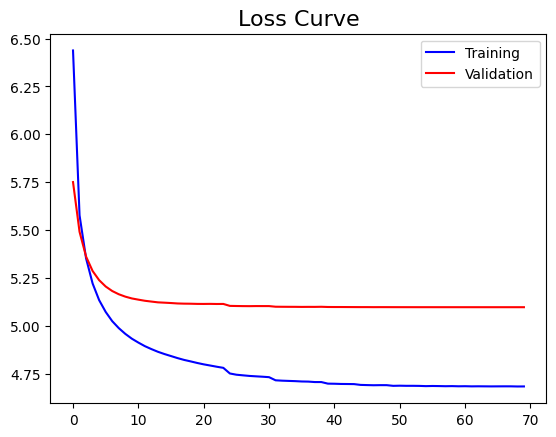

In [10]:
plt.plot(training_loss, color='b', label='Training')
plt.plot(validation_loss, color='r', label="Validation")
plt.title("Loss Curve", size=16)
plt.legend()

In [6]:
model.load_state_dict(torch.load('./good/model_20250409_203540_transformer.torch'))

<All keys matched successfully>

In [8]:
model.eval()
ppl = evaluate_perplexity(model, metrics['perp'], test_loader, device)
print("perplexity", ppl)

#        bleu = evaluate_perplexity(model, metrics['bleu'], test_loader, device) 
#        print("bleu", bleu)

print(model.prompt('Which do you prefer? Dogs or cats?'))

perplexity 163.53634336973013
yes, the whole of the same time. but he had a little, and a man who was, and he is not the door of the old man, and a great dealing his eyes, but the other of the same time he would have


In [ ]:
print(model.prompt('Who is Alice?'))